# 主に問1を扱ったファイルです

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# データの読み込み
from sklearn.datasets import fetch_covtype
data = fetch_covtype()

# データフレームの作成
df_data = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target)
df_target -= 1 #n値分類の場合は0~n-1のインデックスじゃないとエラーするので1引く

df_all = pd.concat([df_data, df_target],axis=1).rename(columns={0:'Cover_Type'})


df_all.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,1.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [27]:
# 学習データ・テストデータ分割
X_train, X_test, y_train, y_test = train_test_split(df_all.drop('Cover_Type', axis=1), df_target, test_size = 0.2, stratify=df_target, random_state=11)

y_train = y_train
y_test = y_test


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(464809, 54) (464809, 1)
(116203, 54) (116203, 1)


In [21]:
# NNの学習
mlp = MLPClassifier(hidden_layer_sizes=(30,30), max_iter=150, alpha=0.001)
mlp.fit(X_train, y_train)


/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(30, 30), max_iter=100)

In [22]:
# 予測
y_pred = mlp.predict(X_test)

# 正答率
score = sum(y_pred == y_test) / len(y_test)
print( sum(y_pred == y_test), len(y_test))
print('acc', score)

85925 116203
acc 0.7394387408242472


In [26]:
type(y_train)

numpy.ndarray

In [45]:
# model格納用
models = []

# 学習データの数だけの数列（0行から最終行まで連番）
row_num = list(range(len(y_train)))

# 5分割で交差検証
K_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)


# 学習（5分割）
for train_idx, eval_idx in K_fold.split(row_num, y_train):

    # 交差検証用データの引き出し
    X_train_cv = X_train.iloc[train_idx, :]
    y_train_cv = y_train.iloc[train_idx]
    X_eval_cv = X_train.iloc[eval_idx, :]
    y_eval_cv = y_train.iloc[eval_idx]
    
    
    # 学習
    evaluation_results = {}  
    model = MLPClassifier(hidden_layer_sizes=(30,30), max_iter=150, alpha=0.001)
    model.fit(X_train_cv, y_train_cv)             
                            
    # テスト
    y_pred = model.predict(X_test)

    acc = sum(y_test.values.reshape(-1) == y_pred) / len(y_test)
    print('Testdata accuracy:', acc)
    
    models.append(model) 

/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testdata accuracy: 0.769463783206974


/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testdata accuracy: 0.7778628778947188


/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Testdata accuracy: 0.7729920914262111


/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Testdata accuracy: 0.7862447613228574


/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testdata accuracy: 0.7803154823885786


In [51]:
# テスト
y_pred = model.predict(X_test)

acc = sum(y_test.values.reshape(-1) == y_pred) / len(y_test)
print('Testdata accuracy:', acc)    

Testdata accuracy: 0.7803154823885786


In [57]:
# 予測データの推測確率と正誤リスト

df_pred = pd.DataFrame(y_pred).rename(columns={0:'Pred'})
df_correct = pd.DataFrame(y_test).reset_index().rename(columns={0:'Correct', 'index':'original index'})
tf = pd.DataFrame(y_test.values.reshape(-1) == y_pred).rename(columns={0:'T/F'})


df_pred_TF = pd.concat([df_pred, df_correct],axis=1)
df_pred_TF = pd.concat([df_pred_TF, tf],axis=1)

df_pred_F = df_pred_TF[df_pred_TF['T/F'] == False]
df_pred_T = df_pred_TF[df_pred_TF['T/F'] == True]

df_pred_F

,Pred,original index,Correct,T/F
0,6,378219,1,False
7,0,477453,1,False
10,6,521754,0,False
16,1,493481,0,False
21,1,168649,0,False
...,...,...,...,...
116186,1,536339,0,False
116192,1,175665,0,False
116198,1,211819,0,False
116199,5,318737,1,False


,0,1,2,3,4,5,6
0,0,6825,0,0,20,1,708
1,10561,0,452,1,1595,542,16
2,7,781,0,83,83,1071,13
3,0,8,170,0,0,60,0
4,0,31,0,0,0,0,0
5,5,328,633,44,4,0,0
6,1269,216,1,0,0,0,0


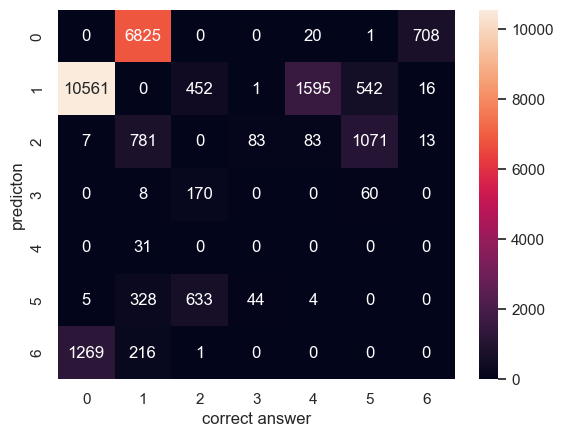

In [60]:
# 何と何を間違えたのか？

df_pred_F[['Pred', 'Correct']]

TF_mat = np.zeros([7,7])
for i in range(7):
    df = df_pred_F[df_pred_F['Pred'] == i]
    for j in range(7):
        TF_mat[i,j]=(len(df[df['Correct'] == j]))

display(pd.DataFrame(TF_mat).astype(int))
sns.heatmap(pd.DataFrame(TF_mat).astype(int), annot=True, fmt='d')
plt.xlabel("correct answer")
plt.ylabel("predicton")
plt.show()

In [62]:
df_all.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3',
       'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
       'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7',
       'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11',
       'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
       'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19',
       'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23',
       'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
       'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31',
       'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35',
       'Soil_Type_36', 'S

# そう言えば標準化していなかったので再チャレンジ

In [63]:
# 標準化する列
scaling_columns = [
        'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
        'Horizontal_Distance_To_Fire_Points'
        ]


sc = StandardScaler().fit(X_train[scaling_columns])

# 標準化して更新
scaled_train = pd.DataFrame(sc.transform(X_train[scaling_columns]), columns=scaling_columns, index=X_train.index)
X_train.update(scaled_train)

scaled_test = pd.DataFrame(sc.transform(X_test[scaling_columns]), columns=scaling_columns, index=X_test.index)
X_test.update(scaled_test)

In [67]:
# model格納用
models = []

# 学習データの数だけの数列（0行から最終行まで連番）
row_num = list(range(len(y_train)))

# 5分割で交差検証
K_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)


# 学習（5分割）
for train_idx, eval_idx in K_fold.split(row_num, y_train):

    # 交差検証用データの引き出し
    X_train_cv = X_train.iloc[train_idx, :]
    y_train_cv = y_train.iloc[train_idx]
    X_eval_cv = X_train.iloc[eval_idx, :]
    y_eval_cv = y_train.iloc[eval_idx]
    
    
    # 学習
    evaluation_results = {}  
    model = MLPClassifier(hidden_layer_sizes=(30,30), max_iter=150, alpha=0.001)
    model.fit(X_train_cv, y_train_cv)             
                            
    # テスト
    y_pred = model.predict(X_test)

    acc = sum(y_test.values.reshape(-1) == y_pred) / len(y_test)
    print('Testdata accuracy:', acc)
    
    models.append(model) 

/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Testdata accuracy: 0.8476287187077787


/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Testdata accuracy: 0.8585922910768224


/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Testdata accuracy: 0.8514410127105152


/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Testdata accuracy: 0.8526974346617557


/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testdata accuracy: 0.8502534357976989


/Users/sawaki/opt/anaconda3/envs/murata_lab/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
# 予測データの推測確率と正誤リスト

df_pred = pd.DataFrame(y_pred).rename(columns={0:'Pred'})
df_correct = pd.DataFrame(y_test).reset_index().rename(columns={0:'Correct', 'index':'original index'})
tf = pd.DataFrame(y_test.values.reshape(-1) == y_pred).rename(columns={0:'T/F'})


df_pred_TF = pd.concat([df_pred, df_correct],axis=1)
df_pred_TF = pd.concat([df_pred_TF, tf],axis=1)

df_pred_F = df_pred_TF[df_pred_TF['T/F'] == False]
df_pred_T = df_pred_TF[df_pred_TF['T/F'] == True]

df_pred_F

,Pred,original index,Correct,T/F
16,1,493481,0,False
20,1,348910,0,False
21,1,168649,0,False
22,1,86496,0,False
30,2,563118,1,False
...,...,...,...,...
116188,0,73184,1,False
116192,1,175665,0,False
116194,1,199614,0,False
116198,1,211819,0,False


,0,1,2,3,4,5,6
0,0,3098,0,0,50,10,492
1,8904,0,371,0,950,389,52
2,4,289,0,154,44,757,0
3,0,0,50,0,0,14,0
4,57,216,4,0,0,4,0
5,22,275,579,45,12,0,0
6,510,49,0,0,0,0,0


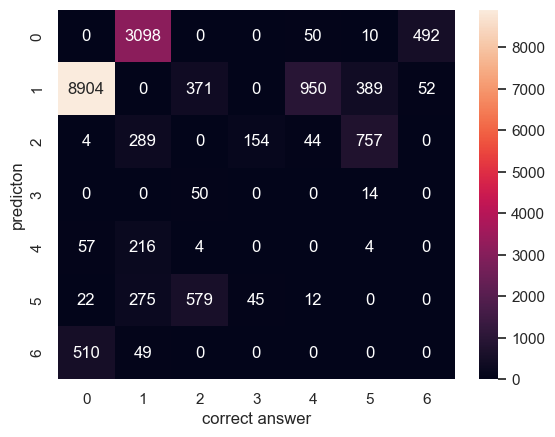

In [69]:
# 何と何を間違えたのか？

df_pred_F[['Pred', 'Correct']]

TF_mat = np.zeros([7,7])
for i in range(7):
    df = df_pred_F[df_pred_F['Pred'] == i]
    for j in range(7):
        TF_mat[i,j]=(len(df[df['Correct'] == j]))

display(pd.DataFrame(TF_mat).astype(int))
sns.heatmap(pd.DataFrame(TF_mat).astype(int), annot=True, fmt='d')
plt.xlabel("correct answer")
plt.ylabel("predicton")
plt.show()